# 回帰分析

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ生成

In [2]:
x = np.linspace(0, 1, 10)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=0.25, size=x.shape)
x_train = x
y_train = y

In [3]:
# 真値
xx = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * xx)

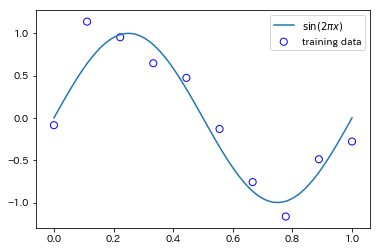

In [4]:
plt.scatter(x_train, y_train,facecolor="none", edgecolor="b", s=50,  label="training data")
plt.plot(xx, y_true, label="$\sin(2\pi x)$")
plt.legend()

## 多項式回帰

モデルとして以下を用いる。

$y(x) = \sum_{i=0}^{d} w_{i} x^{i} = \boldsymbol{w}^{\mathrm{T}} \boldsymbol{\phi(x)}$

ただし、$\boldsymbol{w}=[w_{0}, w_{1}, ..., w_{d}], \boldsymbol{\phi(x)} = [1, x, x^{2}, ..., x^{d}]$である。

## 学習

訓練データ$X = [x_{1}, x_{2}, ..., x_{n}], \boldsymbol{y} = [y_{1}, y_{2}, ..., y_{n}]$に対してモデルは
$\boldsymbol{y} = \Phi \boldsymbol{w}$と書ける。

ただし、$\Phi = [\boldsymbol{\phi}(x_{1}), \boldsymbol{\phi}(x_{2}),.., \boldsymbol{\phi}(x_{n})]^{\mathrm{T}}$である。

よって、最小化する目的関数は$L = ||\boldsymbol{y}  - \Phi \boldsymbol{w}||^2$と書け、

$\frac{\partial L}{\partial \boldsymbol{w}} = 2 \Phi^{\mathrm{T}} (\boldsymbol{y} - \Phi \boldsymbol{w}) = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( \Phi^{\mathrm{T}} \Phi \right)^{-1}  \Phi^{\mathrm{T}} \boldsymbol{y}$

In [5]:
def polynomial_features(x, degree=3):
    """多項式特徴ベクトルに変換
         X = [[1, x1, x1^2, x1^3],
                 [1, x2, x2^2, x2^3],
                   ...                             
                 [1, xn, xn^2, xn^3]]"""
    X = np.ones((len(x), degree+1))
    X_t = X.T
    for i in range(1, degree+1):
        X_t[i] = X_t[i-1] * x
    return X_t.T

In [6]:
Phi = polynomial_features(x_train)
# w = np.dot(np.linalg.pinv(Phi), y_train)
pinv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(pinv, y_train)

## 予測

入力を多項式特徴ベクトル$\boldsymbol{\phi(x)}$に変換し、
$\boldsymbol{y}(x) = \Phi \hat{\boldsymbol{w}}$で予測する。

In [7]:
Phi_test = polynomial_features(xx)
y_pred = np.dot(Phi_test, w)

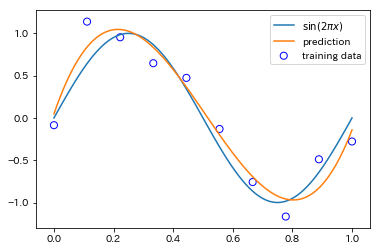

In [8]:
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xx, y_true, label="$\sin(2\pi x)$")
plt.plot(xx, y_pred, label="prediction")
plt.legend()
plt.show()